In [112]:
import json
import pandas as pd
import numpy as np
import os
import re

In [2]:
JSON_file = os.path.join("Resources/", "wikipedia.movies.json")
kaggle_file_1 = os.path.join("Resources/", "movies_metadata.csv")
kaggle_file_2 = os.path.join("Resources/", "ratings.csv")

In [3]:
with open(JSON_file, mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
len(wiki_movies_raw)

7311

In [5]:
# Check first 5 records from the JSON file
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# Check the last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Check 5 records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
ratings = pd.read_csv(kaggle_file_2)

In [9]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [13]:
kaggle_metadata = pd.read_csv(kaggle_file_1, low_memory=False)

In [14]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [15]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
24854,False,"{'id': 386549, 'name': 'Fat, Sick & Nearly Dea...",0,"[{'id': 99, 'name': 'Documentary'}]",http://fatsickandnearlydead2.com/,291155,tt3701804,en,"Fat, Sick & Nearly Dead 2",Joe Cross took viewers on his journey from ove...,...,2014-09-18,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Get Your JUICE ON!,"Fat, Sick & Nearly Dead 2",False,6.2,19.0
44850,False,NaN,2000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,75438,tt1820462,ru,Beremennyy,The main character of the film Sergey Dobrolyu...,...,2011-07-21,8000000.0,81.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Pregnant,False,3.1,7.0
6398,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,32235,tt0322659,en,Northfork,"""We are all angels. It is what we do with our ...",...,2003-01-01,0.0,103.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Northfork,False,6.8,26.0
27756,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,25657,tt0483022,ja,かもめ食堂,Where are we welcome? On a quiet street in Hel...,...,2006-06-11,0.0,102.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Kamome Diner,False,7.1,10.0
6538,False,NaN,14000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,2830,tt0270980,en,My Boss's Daughter,When a young man agrees to housesit for his bo...,...,2003-08-21,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,My Boss's Daughter,False,4.4,189.0


In [16]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
5407117,55741,95,3.0,1115791045
22385188,232289,1617,3.0,1203956968
19682812,204451,34405,4.5,1145773922
18761056,194842,2336,4.0,962185783
22685221,235719,7361,3.0,1477405633


In [17]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [18]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [31]:
# Making a list of movies that have a Director (Dyrected by) value and imdb_link
wiki_movies = [movie for movie in wiki_movies_raw
                  if ('Director' in movie or 'Directed by' in movie) 
                  and 'imdb_link' in movie
                  and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [32]:
# Identifying maximum number of columns in the wiki_movies list
columns = []
for movie in wiki_movies:
        for key in movie.keys():
            if key not in columns:
                columns.append(key)

len(columns)

75

In [33]:
columns

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Also known as',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Screen story by',
 'Hangul',
 'Revised Romanization

In [36]:
# Another way to find number of columns in wiki_movies list of dicts
wiki_movies_df = pd.DataFrame(wiki_movies)
len(wiki_movies_df.columns)

75

In [67]:
# Checking the column names that may hold alternate title data
wiki_movies_df[wiki_movies_df['Yiddish'].notnull()][['title', 'Yiddish']]

,title,Yiddish
6719,Menashe,מנשה


In [80]:
# Create a list of columns holding alternate title data
alt_keys = ['Also known as', 'Arabic', 'Cantonese', 'Chinese', 'French', 'Hangul', 'Hebrew', 'Hepburn', 
            'Japanese', 'Literally', 'Mandarin', 'McCune–Reischauer', 'Original title', 'Polish', 
            'Revised Romanization', 'Romanized', 'Russian', 'Simplified', 'Traditional', 'Yiddish']

In [86]:
def clean_movie(movie):
    movie = dict(movie) # create a non-destructive copy
    alt_titles = {}       # empty dict to hold alternative titles
    
    # Looping through the keys in the list of alt title columns
    for key in alt_keys:
        # if the column found in the movie
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    
    # After looping through all the keys - add the list of alt titles to the movie
    if len(alt_titles) > 0:
        movie['Alt titles'] = dict(alt_titles)
        print(f"The following alt titles were found: {alt_titles}")
        
    # Defining a function to consolidate columns with the same data into one column
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    # Merging columns with a slightly different names
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    return movie

In [87]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

The following alt titles were found: {'Mandarin': 'Xǐyàn', 'Traditional': '喜宴'}
The following alt titles were found: {'Also known as': 'Detonator II: Night Watch'}
The following alt titles were found: {'Mandarin': 'Dōng Gōng Xī Gōng', 'Simplified': '东宫西宫', 'Traditional': '東宮西宮'}
The following alt titles were found: {'French': 'Le Cinquième Élément'}
The following alt titles were found: {'Hangul': '원더풀 데이즈', 'McCune–Reischauer': 'Wŏndŏp‘ul teijŭ', 'Revised Romanization': 'Wondeopul deijeu'}
The following alt titles were found: {'Hangul': '파이 스토리', 'McCune–Reischauer': 'P‘ai sŭt‘ori', 'Revised Romanization': 'Pai seutori'}
The following alt titles were found: {'Original title': 'ואלס עם באשיר'}
The following alt titles were found: {'Hepburn': 'Omoide no Mānī', 'Japanese': '思い出のマーニー', 'Literally': 'Marnie of [my] Memories'}
The following alt titles were found: {'Cantonese': ['Jip', '6', 'Man', '6', 'Saam', '1'], 'Mandarin': 'Yè Wèn Sān', 'Simplified': '叶问3', 'Traditional': '葉問3'}
The foll

In [124]:
# Set the wiki_movies_df to be the DataFrame created from clean_movies
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Alt titles',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'imdb_link',
 'title',
 'url',
 'year']

In [125]:
# Current number of columns in the wiki_movies_df
len(wiki_movies_df.columns)

39

In [126]:
# Extract IMDB IDs for each movie using regular expression
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
# Delete rows with the duplicate IMDB IDs
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,Alt titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [127]:
# Finding columns with mostly null values
wiki_movies_df.isnull().sum()

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Composer(s)                518
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggeste

In [128]:
# Create a list of columns containing less than 90% null values
wiki_columns_to_keep = [ column for column in wiki_movies_df.columns 
                            if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9 ]
# Delete the columns containing 90% or more null values
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
# Number of columns in a cleaned DataFrame
len(wiki_movies_df.columns)

21

In [129]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [130]:
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)

5485

In [132]:
# See which cells are not the string type
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [133]:
# Join the list values into strings with the '' separator
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [138]:
# Create regular expression for the form 1 of box office
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
# How many times it appears in the df?
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3903

In [139]:
# Create regular expression for the form 2 of box office
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
# How many times it appears in the df?
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1559

In [141]:
# Replace the numbers given as a range with just one number
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [142]:
# Find the strings that doesn't match neither form_one nor form_two
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)
box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [144]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,### or $###.###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas or periods
        s = re.sub('\$|,|\.','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [152]:
# Extract numeric box office values from strings and turn them into decimal numbers
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', 
                                                      flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office'][:10]

0    21400000.0
1     2700000.0
2    57718089.0
3     7331647.0
4     6939946.0
5           NaN
6           NaN
7           NaN
8           NaN
9      855810.0
Name: box_office, dtype: float64

In [153]:
# Delete the old 'Box office' column
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [157]:
wiki_movies_df.tail()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,$42 million,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919,41900000.0
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,$60 million,Adam McKay,Mirror Releasing,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538,76100000.0
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,$20 million,Mimi Leder,Focus Features,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788,38400000.0
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Julie Kirkwood,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",123 minutes,United States,...,$9 million,Karyn Kusama,Mirror Releasing,Plummy Tucker,Theodore Shapiro,"[Fred Berger, Phil Hay, Matt Manfredi]","[30West, Automatik Entertainment, Annapurna Pi...","[Phil Hay, Matt Manfredi]",tt7137380,5500000.0
7075,https://en.wikipedia.org/wiki/Black_Mirror:_Ba...,2018,https://www.imdb.com/title/tt9495224/,Bandersnatch,NaN,"[Fionn Whitehead, Will Poulter, Craig Parkinso...","[Aaron Morton, Jake Polonsky]","[28 December 2018, (, 2018-12-28, )]",Variable; 90 minutes for default path,United Kingdom,...,NaN,David Slade,Netflix,Tony Kearns,Brian Reitzell,Russell McLean,"[House of Tomorrow, Netflix]",Charlie Brooker,tt9495224,NaN


In [159]:
# Create a Series from the non-null values of the column 'Budget'
budget = wiki_movies_df['Budget'].dropna()
budget[:20]

0                             $20 million
1                              $6 million
2                             $35 million
3                             $12 million
4                             $25 million
10                            $50 million
11                            $22 million
13                            $29 million
14                            $40 million
15                             $7 million
16    [$2,500,000, [, citation needed, ]]
18                            $20 million
22                            $47 million
25                            $15 million
27                            $10 million
29                            $10 million
33                            $13 million
37                           $5.2 million
39                          $17.5 million
42                          US$18 million
Name: Budget, dtype: object

In [160]:
# Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [161]:
# Remove any values between a dollar sign and a hyphen (for budgets given in ranges)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [162]:
# Find the strings that doesn't match neither form_one nor form_two
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [163]:
# Delete numbers in square brackets
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [164]:
# Extract numeric budget values from strings and turn them into decimal numbers
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
# Delete the old 'Budget' column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [165]:
# Create a Series from the non-null values of the column 'Release date' and turn all lists into strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [166]:
# Create regular expressions to match different formats of the date
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [167]:
# Extract the dates, turn them into a unified date format and create new column
wiki_movies_df['release_date'] = pd.to_datetime(
                    release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], 
                    infer_datetime_format=True)
# Delete the old 'Release date' column
wiki_movies_df.drop('Release date', axis=1, inplace=True)

In [168]:
# Create a Series from the non-null values of the column 'Running time' and turn all lists into strings
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [171]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [172]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [179]:
# Extracting the known values of the running time
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

# Turning the strings into columns with numeric values and replacing empty strings with 0
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract.sample(10)

,0,1,2
6670,0.0,0.0,126.0
1031,0.0,0.0,97.0
3691,0.0,0.0,105.0
2827,0.0,0.0,103.0
4434,0.0,0.0,101.0
5161,0.0,0.0,133.0
6059,0.0,0.0,107.0
4854,0.0,0.0,112.0
430,0.0,0.0,93.0
6117,0.0,0.0,100.0


In [182]:
# Create new 'running_time' with the unified time values
wiki_movies_df['running_time'] = running_time_extract.apply(
                                            lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

# Delete the old 'Running time' column
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [183]:
# Cleaning the Kaggle Metadata file
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [184]:
# Only keep rows where column 'adult' is False, and then drop the 'adult' column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [186]:
# Convert 'video' column into Boolean format
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [187]:
# Convert 'budget', 'id' and 'popularity' into numeric values
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [188]:
# Convert 'release date' into the datetime format
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [189]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [190]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

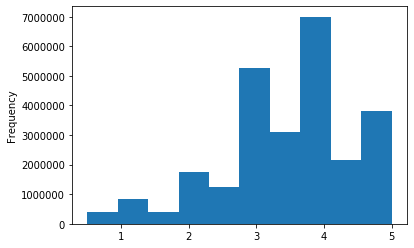

In [191]:
# Generate descriptive statistics for the ratings
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()